# 手写数字识别

### 读取数据

In [59]:
from tensorflow.examples.tutorials.mnist import input_data
Folder="C:\\Users\\wycmg\\data_set\\mnist"
mnist=input_data.read_data_sets(Folder,one_hot=True)

Extracting C:\Users\wycmg\data_set\mnist\train-images-idx3-ubyte.gz
Extracting C:\Users\wycmg\data_set\mnist\train-labels-idx1-ubyte.gz
Extracting C:\Users\wycmg\data_set\mnist\t10k-images-idx3-ubyte.gz
Extracting C:\Users\wycmg\data_set\mnist\t10k-labels-idx1-ubyte.gz


## 打印图片数据

输入数据: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据打印shape: (55000, 784)


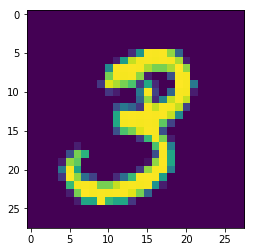

In [3]:
print("输入数据:",mnist.train.images)
print("输入数据打印shape:",mnist.train.images.shape)

import pylab
im=mnist.train.images[1]
im=im.reshape(28,28)
pylab.imshow(im)
pylab.show()


### 对模型进行训练

In [20]:
import tensorflow as tf

tf.reset_default_graph()

#1.定义相关占位符与变量 

#none 表示这个张量可以是任意长度
x=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10])


W=tf.Variable(tf.random_normal([784,10]))
b=tf.Variable(tf.zeros([10]))

#2.定义softmax分类器
pred=tf.nn.softmax(tf.matmul(x,W)+b)

#3.定义损失loss函数
cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))

learn_rate=0.001

#4.定义反向函数
optmizer=tf.train.GradientDescentOptimizer(learn_rate).minimize(cost)

#定义模型保存模块
saver=tf.train.Saver()
model_path="C:\\Users\\wycmg\\data_set\\model_data\\mnist_"

training_epochs=20
batch_size=10
display_step=1

#5. 执行
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        
        avg_cost=0
        total_batch=int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            _,c=sess.run([optmizer,cost],feed_dict={x:batch_xs,y:batch_ys})
            avg_cost+=c /total_batch
            
        if(epoch+1) %display_step ==0:
            print ("Epoch:",epoch+1,"cost=",avg_cost)
            correct_prediction=tf.equal(tf.arg_max(pred,1),tf.arg_max(y,1))
            accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
            
    result=accuracy.eval({x:mnist.test.images,y:mnist.test.labels})
    print(result)
        
    
    
    
    save_path=saver.save(sess,model_path)
    print("finished!")

Epoch: 1 cost= 8.413311454686244
Epoch: 2 cost= 4.410791150022635
Epoch: 3 cost= 3.0637753695886247
Epoch: 4 cost= 2.4290291727850604
Epoch: 5 cost= 2.0619775535859675
Epoch: 6 cost= 1.821569282016206
Epoch: 7 cost= 1.6503578068904448
Epoch: 8 cost= 1.5217377204902018
Epoch: 9 cost= 1.421281917459415
Epoch: 10 cost= 1.3402216639686553
Epoch: 11 cost= 1.2731331290722487
Epoch: 12 cost= 1.2163815390107657
Epoch: 13 cost= 1.1678666297287905
Epoch: 14 cost= 1.1254484797060027
Epoch: 15 cost= 1.0881764416870119
Epoch: 16 cost= 1.0549061655528351
Epoch: 17 cost= 1.025181390150768
Epoch: 18 cost= 0.9982583443079888
Epoch: 19 cost= 0.9735374023460215
Epoch: 20 cost= 0.9512753867549311
0.8127
finished!


strating Session2
INFO:tensorflow:Restoring parameters from C:\Users\wycmg\data_set\model_data\mnist_
0.8127
[5 1] [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


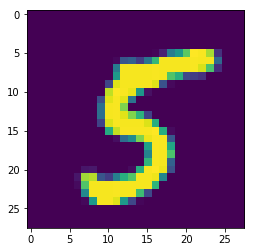

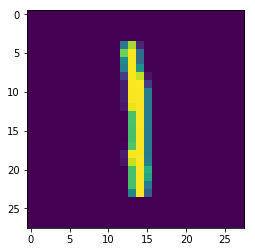

In [58]:
##读取模型时必须还原定义的占位符以及变量 

print("strating Session2")


tf.reset_default_graph()
#none 表示这个张量可以是任意长度
x=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10])


W=tf.Variable(tf.random_normal([784,10]))
b=tf.Variable(tf.zeros([10]))

pred=tf.nn.softmax(tf.matmul(x,W)+b)


cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))

learn_rate=0.001

optmizer=tf.train.GradientDescentOptimizer(learn_rate).minimize(cost)

saver1=tf.train.Saver()
model_path="C:\\Users\\wycmg\\data_set\\model_data\\mnist_"

with tf.Session() as sess2:
   
    sess2.run(tf.global_variables_initializer())
    
    
    
    saver1.restore(sess2,model_path)
    
    correct_prediction=tf.equal(tf.arg_max(pred,1),tf.arg_max(y,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    result=accuracy.eval({x:mnist.test.images,y:mnist.test.labels})
    print(result)
    
    
    output=tf.argmax(pred,1)
    batch_xs,batch_ys=mnist.train.next_batch(2)
    outputval=sess2.run(output,feed_dict={x:batch_xs,y:batch_ys})
    print(outputval,batch_ys)
    
    import pylab
    im=batch_xs[0]
    im=im.reshape(28,28)
    pylab.imshow(im)
    pylab.show() 
    
    im=batch_xs[1]
    im=im.reshape(28,28)
    pylab.imshow(im)
    pylab.show()
    